In [348]:
#import warnings
#warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder

from lightgbm import LGBMRegressor

import requests

#from sklearn import preprocessing

In [349]:
weather_df = pd.read_csv('fiveyearsweatherdata.csv', header = 0) 
weather_df.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,...,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,...,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


In [350]:
one_hot = OneHotEncoder()
transformed_data = one_hot.fit_transform(weather_df[['Weather Type']]).toarray()
df = weather_df.drop('Weather Type', axis=1)
df = pd.concat([df, pd.DataFrame(transformed_data, columns = one_hot.get_feature_names_out())], axis=1)

transformed_data2 = one_hot.fit_transform(weather_df[['Date time']]).toarray()
df2 = weather_df.drop('Date time', axis=1)
df2 = pd.concat([df, pd.DataFrame(transformed_data2, columns = one_hot.get_feature_names_out())], axis=1)
weather_df = df2
weather_df

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Date time_12/30/2019,Date time_12/30/2020,Date time_12/30/2021,Date time_12/30/2022,Date time_12/31/2017,Date time_12/31/2018,Date time_12/31/2019,Date time_12/31/2020,Date time_12/31/2021,Date time_12/31/2022
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,"Kolkata,West Bengal,India",12/27/2022,21.8,30.0,24.9,21.0,80.08,32.0,10.3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4013,"Kolkata,West Bengal,India",12/28/2022,18.3,27.0,22.7,18.1,76.56,27.7,9.2,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4014,"Kolkata,West Bengal,India",12/29/2022,15.0,26.0,20.0,11.5,60.60,NaN,6.9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4015,"Kolkata,West Bengal,India",12/30/2022,14.9,26.0,20.2,13.6,67.41,NaN,5.8,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
weather_df['Conditions'].unique()

array(['Clear', 'Partially cloudy', 'Rain, Partially cloudy', 'Rain',
       'Rain, Overcast', 'Overcast'], dtype=object)

In [352]:
for index, element in enumerate(weather_df['Conditions']):
    if element == 'Clear':
        weather_df.at[index, 'Conditions'] = 1
    elif element == 'Partially cloudy':
        weather_df.at[index, 'Conditions'] = 2
    elif element == 'Rain, Partially cloudy':
        weather_df.at[index, 'Conditions'] = 3
    elif element == 'Rain':
        weather_df.at[index, 'Conditions'] = 4
    elif element == 'Rain, Overcast':
        weather_df.at[index, 'Conditions'] = 5
    elif element == 'Overcast':
        weather_df.at[index, 'Conditions'] = 6

In [353]:
weather_df['Conditions'].unique()

array([1, 2, 3, 4, 5, 6], dtype=object)

In [354]:
weather_df.drop(columns = ['Info', 'Address', 'Resolved Address', 'Name', 'Date time'], inplace = True)

In [355]:
weather_df.head()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,...,Date time_12/30/2019,Date time_12/30/2020,Date time_12/30/2021,Date time_12/30/2022,Date time_12/31/2017,Date time_12/31/2018,Date time_12/31/2019,Date time_12/31/2020,Date time_12/31/2021,Date time_12/31/2022
0,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,78.33,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,148.54,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,244.92,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,244.38,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,231.58,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [356]:
weather_df = weather_df.fillna(weather_df.mean())

In [357]:
weather_df.isna().sum()

Minimum Temperature     0
Maximum Temperature     0
Temperature             0
Dew Point               0
Relative Humidity       0
                       ..
Date time_12/31/2018    0
Date time_12/31/2019    0
Date time_12/31/2020    0
Date time_12/31/2021    0
Date time_12/31/2022    0
Length: 2596, dtype: int64

In [358]:
weather_df.head()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,...,Date time_12/30/2019,Date time_12/30/2020,Date time_12/30/2021,Date time_12/30/2022,Date time_12/31/2017,Date time_12/31/2018,Date time_12/31/2019,Date time_12/31/2020,Date time_12/31/2021,Date time_12/31/2022
0,14.0,25.3,19.9,16.5,82.47,40.563588,5.8,30.265517,78.33,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,26.0,20.6,16.0,76.76,40.563588,8.1,30.265517,148.54,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,27.0,21.1,15.6,73.12,27.300000,9.2,30.265517,244.92,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,25.0,19.9,14.5,72.57,40.563588,8.1,30.265517,244.38,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,25.6,19.6,13.7,71.88,40.563588,8.1,30.265517,231.58,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
y = weather_df.pop('Conditions')

In [360]:
y = y.to_numpy()
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [361]:
weather_df.head()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,...,Date time_12/30/2019,Date time_12/30/2020,Date time_12/30/2021,Date time_12/30/2022,Date time_12/31/2017,Date time_12/31/2018,Date time_12/31/2019,Date time_12/31/2020,Date time_12/31/2021,Date time_12/31/2022
0,14.0,25.3,19.9,16.5,82.47,40.563588,5.8,30.265517,78.33,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,26.0,20.6,16.0,76.76,40.563588,8.1,30.265517,148.54,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,27.0,21.1,15.6,73.12,27.300000,9.2,30.265517,244.92,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,25.0,19.9,14.5,72.57,40.563588,8.1,30.265517,244.38,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,25.6,19.6,13.7,71.88,40.563588,8.1,30.265517,231.58,8.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [362]:
x = weather_df.to_numpy()
x

array([[14. , 25.3, 19.9, ...,  0. ,  0. ,  0. ],
       [16. , 26. , 20.6, ...,  0. ,  0. ,  0. ],
       [16. , 27. , 21.1, ...,  0. ,  0. ,  0. ],
       ...,
       [15. , 26. , 20. , ...,  0. ,  0. ,  0. ],
       [14.9, 26. , 20.2, ...,  0. ,  0. ,  0. ],
       [15.1, 27. , 21.1, ...,  0. ,  0. ,  1. ]])

In [363]:
x.shape, y.shape

((4017, 2595), (4017,))

In [364]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.1)

In [365]:
x_train.shape, x_test.shape

((3615, 2595), (402, 2595))

In [366]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [367]:
y_pred_lr = lrmodel.predict(x_test)

In [368]:
lrp = mean_absolute_percentage_error(y_pred_lr, y_test)
lrp

0.03326291452453726

In [369]:
lre = mean_absolute_error(y_pred_lr, y_test)
lre

0.0889073548304053

In [370]:
lgbmrmodel = LGBMRegressor()
lgbmrmodel.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 3615, number of used features: 33
[LightGBM] [Info] Start training from score 2.296542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor()

In [371]:
y_pred_lgbmr = lgbmrmodel.predict(x_test)

In [372]:
lgbmrp = mean_absolute_percentage_error(y_pred_lgbmr, y_test)
lgbmrp

0.00639389299690724

In [373]:
lgbmre = mean_absolute_error(y_pred_lgbmr, y_test)
lgbmre

0.01631060201015504

In [374]:
gbrmodel = GradientBoostingRegressor()
gbrmodel.fit(x_train, y_train)

GradientBoostingRegressor()

In [375]:
y_pred_gbr = gbrmodel.predict(x_test)
y_pred_gbr

array([2.99998132, 1.00003444, 2.00000788, 2.99998132, 2.99998132,
       1.00003444, 1.00003444, 1.00003444, 2.00000788, 2.00000788,
       2.99998132, 2.00000788, 2.99998132, 2.00000788, 2.00000788,
       2.00000788, 2.99998132, 2.00000788, 1.00003444, 2.99998132,
       2.99998132, 2.00000788, 4.99992819, 2.99998132, 1.00003444,
       2.00000788, 1.00003444, 1.00003444, 2.99998132, 2.00000788,
       2.00000788, 1.00003444, 2.99998132, 4.99992819, 4.99992819,
       2.99998132, 1.00003444, 2.99998132, 2.00000788, 1.00003444,
       2.99998132, 4.99992819, 1.00003444, 4.99992819, 2.00000788,
       4.99992819, 2.00000788, 1.00003444, 1.00003444, 1.00003444,
       2.99998132, 1.00003444, 2.99998132, 2.00000788, 2.99998132,
       2.00000788, 1.00003444, 2.00000788, 4.99992819, 4.99992819,
       2.00000788, 1.00003444, 2.00000788, 1.00003444, 2.00000788,
       2.99998132, 2.99998132, 2.99998132, 2.00000788, 2.00000788,
       4.99992819, 1.00003444, 2.00000788, 1.00003444, 1.00003

In [376]:
gbrp = mean_absolute_percentage_error(y_pred_gbr, y_test)
gbrp

1.563751702075748e-05

In [377]:
gbre = mean_absolute_error(y_pred_gbr, y_test)
gbre

2.8001299663413206e-05

In [378]:
brmodel = BayesianRidge()
brmodel.fit(x_train, y_train)

BayesianRidge()

In [379]:
y_pred_br = brmodel.predict(x_test)

In [380]:
brp = mean_absolute_percentage_error(y_pred_br, y_test)
brp

0.033335004235501786

In [381]:
bre = mean_absolute_error(y_pred_br, y_test)
bre

0.08904517485611298

In [382]:
enrmodel = ElasticNet()
enrmodel.fit(x_train, y_train)

ElasticNet()

In [383]:
y_pred_enr = enrmodel.predict(x_test)

In [384]:
enrp = mean_absolute_percentage_error(y_pred_enr, y_test)
enrp

0.17027360776948552

In [385]:
enre = mean_absolute_error(y_pred_enr, y_test)
enre

0.39653853231378067

In [386]:
data = {'Name': ['LinearRegression', 'LGBMRegressor', 'GradientBoostingRegressor', 'BayesianRidge', 'Elastic Net'], 'Mean Absolute Percentage Error': [lrp, lgbmrp, gbrp, brp, enrp], 'Mean Absolute Error': [lre, lgbmre, gbre, bre, enre]}
df = pd.DataFrame(data)
df

,Name,Mean Absolute Percentage Error,Mean Absolute Error
0,LinearRegression,0.033263,0.088907
1,LGBMRegressor,0.006394,0.016311
2,GradientBoostingRegressor,0.000016,0.000028
3,BayesianRidge,0.033335,0.089045
4,Elastic Net,0.170274,0.396539


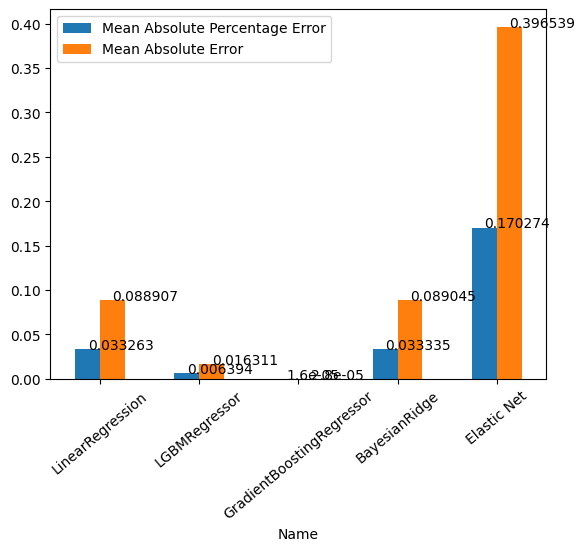

In [387]:
fig, ax = plt.subplots()
df.plot.bar(x = 'Name', y = ['Mean Absolute Percentage Error', 'Mean Absolute Error'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=6), (p.get_x()+p.get_width()/2., p.get_height()))

In [388]:
url = 'https://api.agromonitoring.com/agro/1.0/weather'

# Your API key
api_key = '72dda568eb1979c7393042f3a8b715eb'

# Headers and parameters (if needed)
#headers = {'Authorization': f'Bearer {api_key}'}
#params = {'param1': 'value1', 'param2': 'value2'}

# Making the GET request
response = requests.get(f'https://api.agromonitoring.com/agro/1.0/weather?lat=22.572646&lon=88.363895&appid={api_key}')

# Checking if the request was successful
if response.status_code == 200:
    # Parsing the response JSON
    data = response.json()
    flat = pd.json_normalize(data)
    #rw_df = pd.DataFrame(flat)
    #print(flat)
    print(data)
else:
    print(f'Failed to retrieve data: {response.status_code}')

{'dt': 1705408078, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'main': {'temp': 291.11, 'feels_like': 290.97, 'temp_min': 291.11, 'temp_max': 291.11, 'pressure': 1013, 'humidity': 77}, 'wind': {'speed': 2.06, 'deg': 30}, 'clouds': {'all': 20}}
